# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

#**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

##1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [12]:
avg_price = df.loc[:, ['Price', 'Neighbourhood ']].groupby('Neighbourhood ').mean()
print(avg_price)
avg_score = df.loc[:, ['Review Scores Rating', 'Neighbourhood ']].groupby('Neighbourhood ').mean()
print(avg_score)

                     Price
Neighbourhood             
Bronx            75.276498
Brooklyn        127.747378
Manhattan       183.664286
Queens           96.857233
Staten Island   146.166667
                Review Scores Rating
Neighbourhood                       
Bronx                      91.654378
Brooklyn                   92.363497
Manhattan                  91.801496
Queens                     91.549057
Staten Island              90.843750


Manhattan is the most expensive bourough while Brooklyn has the highest average review scores rating.

<Axes: xlabel='Price', ylabel='Density'>

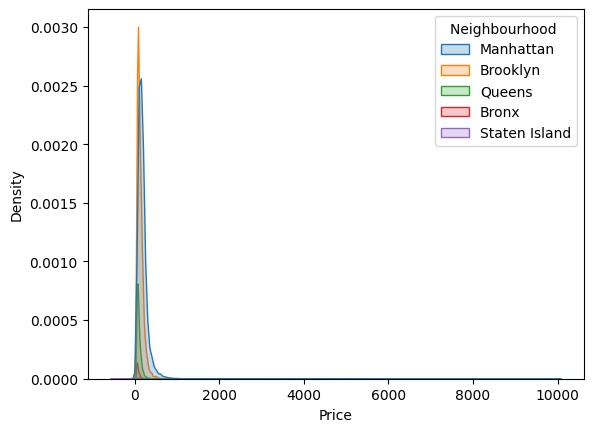

In [13]:
sns.kdeplot(data = df, x = 'Price', hue = 'Neighbourhood ', fill = True)

<Axes: xlabel='price_log', ylabel='Density'>

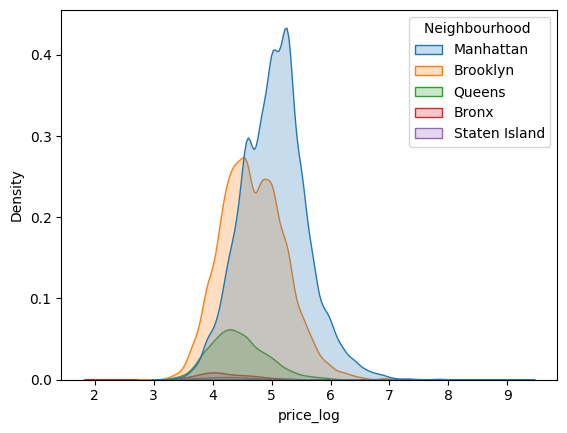

In [14]:
df['price_log'] = np.log(df['Price'])
sns.kdeplot(data = df, x = 'price_log', hue = 'Neighbourhood ', fill = True)

##2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [16]:
# Target Variable
y = df['Price']
# Neighbourhood Dummy
ddf = pd.get_dummies(df['Neighbourhood '], dtype='int')
ddf.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [18]:
# Regression:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(ddf, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print('R-squared: ', reg.score(ddf, y))
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients from the result of the linear regression are the same as the mean values we found in part 1. This is because there are no control variables. Thus, the coefficients in a regression of a continuous variable on one categorical variable are just the grouped averages.

##3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [22]:
# Target Variable
y = df['Price']
# Neighbourhood Dummy
ddf = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True)
ddf.head()

,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [23]:
# Regression:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(ddf, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print('R-squared: ', reg.score(ddf, y))
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [24]:
print('Intercept: ', reg.intercept_)

Intercept:  75.27649769585331


By dropping the first level in order to get k-1 dummies out of k categorical levels, the previous coefficient for the Bronx bourough becomes the intercept. In order to get the coefficients form Part 2, we would need to add the intercept (Bronx mean price) to the current coefficients.

##4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:, ['Review Scores Rating', 'Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100)

dummy_neighbourhood_train = pd.get_dummies(X_train['Neighbourhood '], dtype='int')
dummy_neighbourhood_test = pd.get_dummies(X_test['Neighbourhood '], dtype='int')

Z_train = pd.concat([X_train['Review Scores Rating'],
                     dummy_neighbourhood_train], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                     dummy_neighbourhood_test], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('R-squared: ', reg.score(Z_test, y_test))
print('RMSE: ', np.sqrt(np.mean((y_test - y_hat)**2)))

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

R-squared:  0.06701086106947296
RMSE:  125.01092061382933
               variable  coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393


Since Manhattan has the highest coefficient, the most expensive type of property you can rent is one in the Manhattan bourough. The rent would be 100\*1.032257 + 89.421020 = **192.6257**.

##5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:, ['Review Scores Rating', 'Neighbourhood ', 'Property Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100)

dummy_neighbourhood_train = pd.get_dummies(X_train['Neighbourhood '], dtype='int')
dummy_neighbourhood_test = pd.get_dummies(X_test['Neighbourhood '], dtype='int')

dummy_property_train = pd.get_dummies(X_train['Property Type'], dtype='int')
dummy_property_test = pd.get_dummies(X_test['Property Type'], dtype='int')

# Used ChatGPT to get the following lines of code in order to avoid a ValueError
# "ValueError: The feature names should match those that were passed during fit."
# Align columns in training and test dummy data to avoid missing features in either set
dummy_neighbourhood_test = dummy_neighbourhood_test.reindex(columns=dummy_neighbourhood_train.columns, fill_value=0)
dummy_property_test = dummy_property_test.reindex(columns=dummy_property_train.columns, fill_value=0)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     dummy_neighbourhood_train, dummy_property_train], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                     dummy_neighbourhood_test, dummy_property_test], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-27.672764
2,Brooklyn,29.242598
3,Manhattan,91.749874
4,Queens,-0.373421
5,Staten Island,44.825719
6,Apartment,-2.497177
7,Bed & Breakfast,-33.828909
8,Boat,64.452800
9,Bungalow,51.260095


The most expensive kind of property you can rent is a top-rated Condominium in Manhattan.

In [34]:
100*1.015839 + 91.749874 + 92.345440

285.679214

##6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

In part 4, the coefficient was 1.032257 and in part 5 it was 1.015839. Since these coefficients are pretty similar, the relationship between review scores rating, neighbourhood and price is largely indpendent of the variable included in the multi linear regression model, which is property type. The addition of property type didn't significantly affect the coefficient, so it didn't signifacntly affect the outcome of the price.

#**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

##1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/cars_hw.csv')
df0 = df # save a copy
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

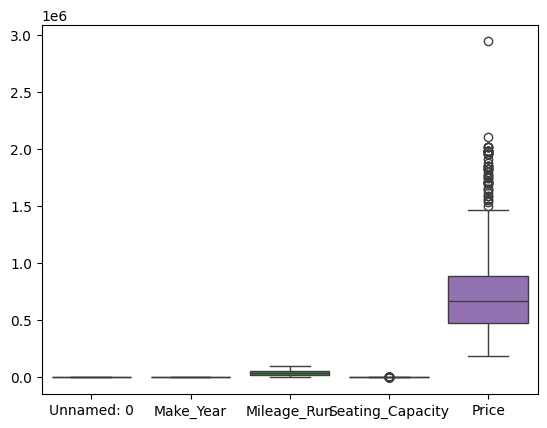

In [45]:
sns.boxplot(data = df)

In [46]:
print(df.columns)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


<Axes: >

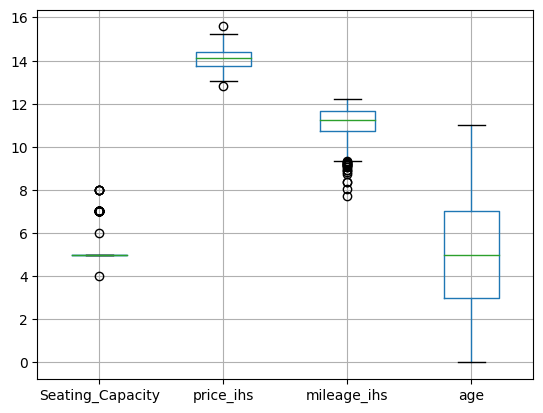

In [47]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

##2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [50]:
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


<Axes: xlabel='Price', ylabel='Density'>

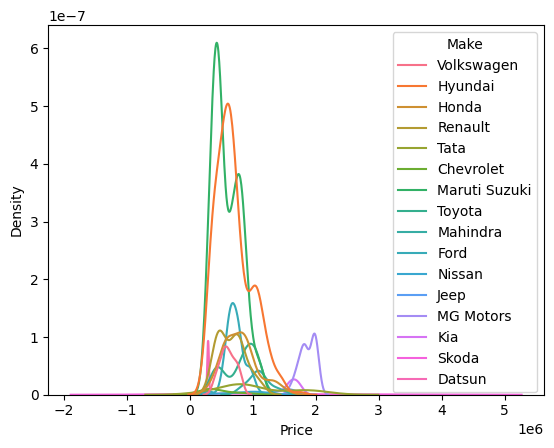

In [52]:
sns.kdeplot(data = df0, x = 'Price', hue = 'Make')

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


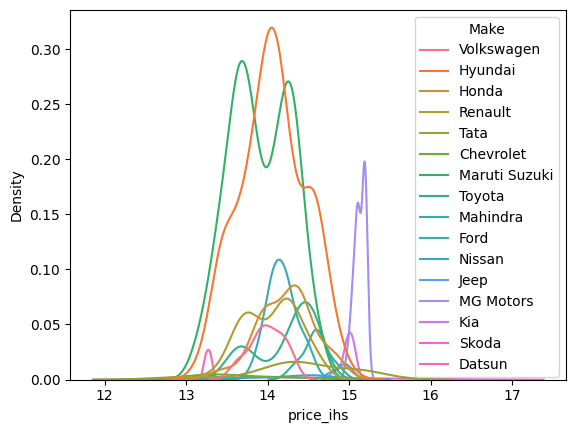

In [53]:
sns.kdeplot(data = df, x = 'price_ihs', hue = 'Make')
df['price_ihs'].groupby(df['Make']).describe()

In [55]:
# order pmean price from least to greatest
df0['Price'].groupby(df0['Make']).mean().sort_values()

,Price
Make,
Datsun,2.896667e+05
Chevrolet,4.535000e+05
Maruti Suzuki,5.887850e+05
Volkswagen,6.058276e+05
Renault,6.625735e+05
Hyundai,6.918918e+05
Ford,7.211731e+05
Honda,7.989726e+05
Toyota,8.003400e+05


The most expensive cars are MG Motors, having a mean of 15.132199. The Jeep and Kia cars have means of 14.909738 and 14.985324, making them also part of the most expensive car brands. There's a minimum mean price of 289,666.70 for Datsun and a maximum mean price of 1,869,457 for MG Motors.

##3. Split the data into an 80% training set and a 20% testing set.

In [56]:
# Randomize the rows in the dataframe:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

# So the first 0:train_size rows are my training data, and train_size: are my test data.

##4. Make a model where you regress price on the numeric variables alone; what is the  R2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  R2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  R2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [57]:
from sklearn import linear_model

# Numeric regression:
var_n = ['age','mileage_ihs','Seating_Capacity']
X_train_n = df_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train)
X_test_n = df_test.loc[:,var_n]
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  0.45254262356326824
Numeric only RMSE:  0.33392654735906463


In [58]:
# Categorical regression:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only Rsq:  0.6298129532407464
Categorical only RMSE:  0.27459106425227275


The categorical regression has a higher R-squared and a lower RMSE, meaning the predicted values were closer to the actual values than in the numerical regression. Thus, the categorical regression performed better.

In [59]:
# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

All Rsq:  0.7999206763763922
All RMSE:  0.20187237686198914


This thrid model performs better than both the numerical and categorical regressions. It has a higher R-squared, meaining it explains a decent proportion of the variance. It also has a lower RMSE, meaning the predicted values were closer to the actual values.

##5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 4?

In [60]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.7999206763763922
1 RMSE:  0.20187237686198914
2  Rsq:  0.8025408094604635
2 RMSE:  0.2005462138908579
3  Rsq:  0.7996599800454635
3 RMSE:  0.20200385035775245
4  Rsq:  -5077888181.655391
4 RMSE:  32160.097581097867


As the degree of expansion increases, the R-squared stays relatively the same until we get to the 4th round, when it becomes negative. The RMSE also stays around the same value until the 4th round, when it skyrockets. The best model would be round 2, since it has the highest R-squared (0.8025408094604635) and the lowest RMSE (0.2005462138908579). This is a better performance than any of the regressions in Part 4.

##6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='price_ihs'>

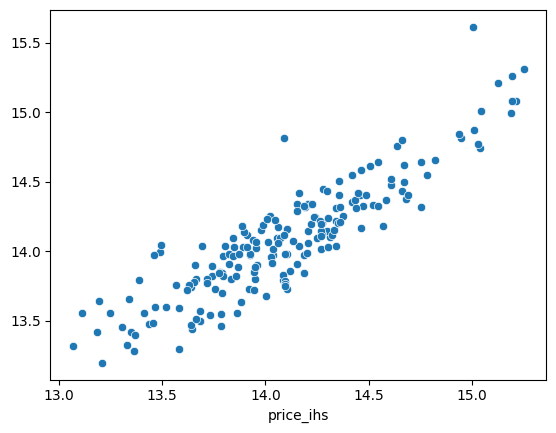

In [61]:
# Use round with best performance:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

sns.scatterplot(x=y_test,y=y_hat_all)

The predicted values and true values line up along a positive diagonal.

<Axes: xlabel='price_ihs', ylabel='Density'>

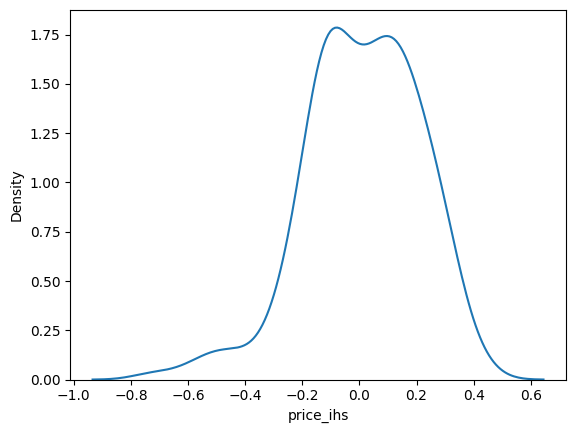

In [62]:
sns.kdeplot(residuals)

This KDP has two humps at the top, meaning it's slightly bi-modal. Thus, it is not quite a normal, bell-shaped distribution. The bi-modal suggests that there iare two different groups or patterns within the data that affect the values differently. Since there's a left tail, there's a stretch of lower values. Furthermore, there might be underlying differences in the data that we are not accounting for. This is a weakness, that we are not accounting for everything that is significant to our data.